In [78]:
import numpy as np
import sys
import math
import timeit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import py3Dmol
from simtk.openmm import openmm
from typing import Any, List, Optional, Tuple

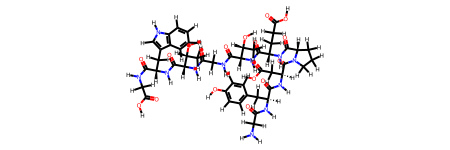

In [79]:
def preprocess_mol(mol: Chem.rdchem.Mol) -> Chem.rdchem.Mol:
    mol = Chem.AddHs(mol)
    AllChem.MMFFSanitizeMolecule(mol)
    return mol

chignolin = Chem.rdmolfiles.MolFromFASTA("GYDPETGTWG")
chignolin = preprocess_mol(chignolin)
chignolin

In [80]:
def drawConformer(mol: Chem.Mol, confId: int=-1, size: Tuple[int, int]=(300, 300), style: str="stick") -> py3Dmol.view:
    """Displays interactive 3-dimensional representation of specified conformer.

    Parameters
    ----------
    mol : RDKit Mol object
        The molecule containing the conformer to be displayed.
    confId : int
        The ID of the conformer to be displayed.
    size : Tuple[int, int]
        The size of the display (width, height).
    style: str
        The drawing style for displaying the molecule. Can be sphere, stick, line, cross, cartoon, and surface.
    """
    block = Chem.MolToMolBlock(mol, confId=confId)
    view = py3Dmol.view(width=size[0], height=size[1])
    view.addModel(block, 'mol')
    view.setStyle({style : {}})
    view.zoomTo()
    return view

drawConformer(chignolin)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [82]:
def get_conformer_energies(mol: Chem.Mol) -> List[float]:
    """Returns a list of energies for each conformer in `mol`.
    """
    energies = []
    Chem.rdForceFieldHelpers.MMFFSanitizeMolecule(mol)
    mmff_props = Chem.rdForceFieldHelpers.MMFFGetMoleculeProperties(mol)
    for conf in mol.GetConformers():
        ff = Chem.rdForceFieldHelpers.MMFFGetMoleculeForceField(mol, mmff_props, confId=conf.GetId())
        energy = ff.CalcEnergy()
        energies.append(energy)
    
    return np.asarray(energies, dtype=float)

Chem.AllChem.EmbedMolecule(chignolin)
get_conformer_energies(chignolin)

array([721.56022004])